In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.datasets import cifar10
from sklearn.decomposition import PCA

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170498071/170498071 [==============================] - 3s 0us/step


In [3]:
print('Traning data shape:', x_train.shape)
print('Testing data shape:', x_test.shape)
print('Traning data shape Y:', y_train.shape)
print('Testing data shape Y:', y_test.shape)

Traning data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)
Traning data shape Y: (50000, 1)
Testing data shape Y: (10000, 1)


In [4]:
# Find the unique numbers from the train labels
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)


Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline


In [6]:
label_dict = {
 0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck',
}


Text(0.5, 1.0, '(Label: frog)')
Text(0.5, 1.0, '(Label: cat)')


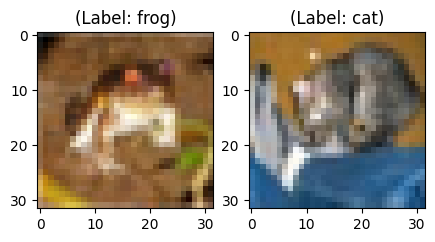

In [7]:
plt.figure(figsize=[5,5])

# Eğitim veri setinde bir örnek
plt.subplot(121)
curr_img = np.reshape(x_train[0], (32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_train[0][0]]) + ")"))

# Test veri setinde bir örnek
plt.subplot(122)
curr_img = np.reshape(x_test[0],(32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_test[0][0]]) + ")"))


In [8]:
np.min(x_train),np.max(x_train)

(0, 255)

In [9]:
x_train = x_train/255.0
np.min(x_train),np.max(x_train)

(0.0, 1.0)

In [10]:
x_train.shape

(50000, 32, 32, 3)

In [11]:
x_train_flat = x_train.reshape(-1,3072)
x_train_flat.shape

(50000, 3072)

In [12]:
feat_cols = ['pixel'+str(i) for i in range(x_train_flat.shape[1])]
df_cifar = pd.DataFrame(x_train_flat,columns=feat_cols)
df_cifar['label'] = y_train
print('Size of the dataframe: {}'.format(df_cifar.shape))


Size of the dataframe: (50000, 3073)


In [13]:
df_cifar.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,label
0,0.231373,0.243137,0.247059,0.168627,0.180392,0.176471,0.196078,0.188235,0.168627,0.266667,...,0.847059,0.721569,0.549020,0.592157,0.462745,0.329412,0.482353,0.360784,0.282353,6
1,0.603922,0.694118,0.733333,0.494118,0.537255,0.533333,0.411765,0.407843,0.372549,0.400000,...,0.560784,0.521569,0.545098,0.560784,0.525490,0.556863,0.560784,0.521569,0.564706,9
2,1.000000,1.000000,1.000000,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.305882,0.333333,0.325490,0.309804,0.333333,0.325490,0.313725,0.337255,0.329412,9
3,0.109804,0.098039,0.039216,0.145098,0.133333,0.074510,0.149020,0.137255,0.078431,0.164706,...,0.211765,0.184314,0.109804,0.247059,0.219608,0.145098,0.282353,0.254902,0.180392,4
4,0.666667,0.705882,0.776471,0.658824,0.698039,0.768627,0.694118,0.725490,0.796078,0.717647,...,0.294118,0.309804,0.321569,0.278431,0.294118,0.305882,0.286275,0.301961,0.313725,1


In [14]:
pca_cifar = PCA(n_components=2)
principalComponents_cifar = pca_cifar.fit_transform(df_cifar.iloc[:,:-1])
principal_cifar_Df = pd.DataFrame(data = principalComponents_cifar
             , columns = ['principal component 1', 'principal component 2'])
principal_cifar_Df['y'] = y_train


In [15]:
principal_cifar_Df.head()


,principal component 1,principal component 2,y
0,-6.401018,2.729039,6
1,0.829783,-0.949943,9
2,7.730200,-11.522102,9
3,-10.347817,0.010738,4
4,-2.625651,-4.969240,1


In [16]:
print('varyans: {}'.format(pca_cifar.explained_variance_ratio_))


Explained variation per principal component: [0.2907663  0.11253144]


<Axes: xlabel='principal component 1', ylabel='principal component 2'>

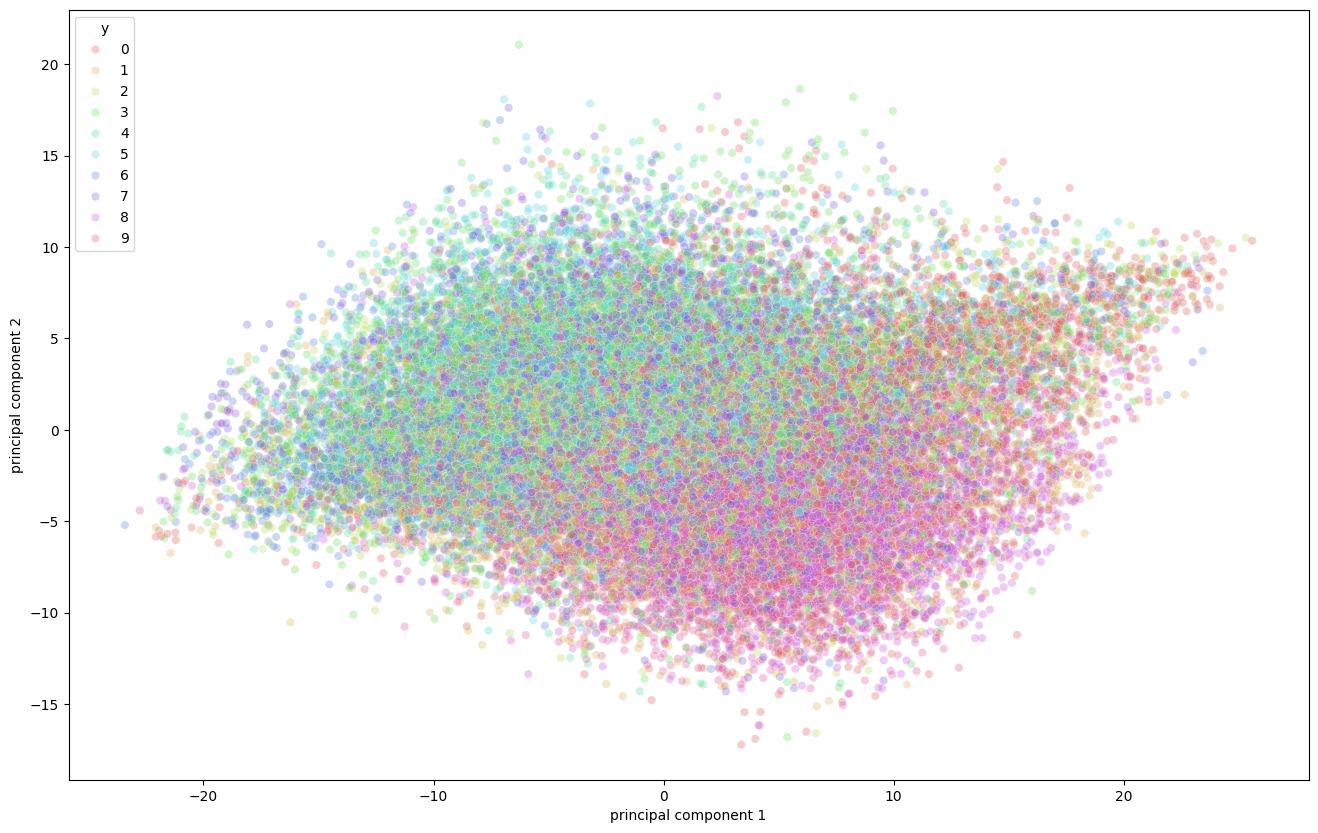

In [17]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=principal_cifar_Df,
    legend="full",
    alpha=0.3
)


In [18]:
x_test = x_test/255.0

In [19]:
x_test = x_test.reshape(-1,32,32,3)
x_test_flat = x_test.reshape(-1,3072)
x_test_flat.shape

(10000, 3072)

In [20]:
pca = PCA(0.9)


In [21]:
pca.fit(x_train_flat)


PCA(n_components=0.9)

In [22]:
PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
pca.n_components_



99

In [23]:
train_img_pca = pca.transform(x_train_flat)
test_img_pca = pca.transform(x_test_flat)

In [24]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras.optimizers import RMSprop


In [25]:
y_train.shape

(50000, 1)

In [26]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [27]:
batch_size = 128
num_classes = 10
epochs = 20


In [28]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(99,)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


In [29]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              102400    
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 10)                2570      
                                                                 
Total params: 1810698 (6.91 MB)
Trainable params: 1810698 (6.91 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])



In [31]:
history = model.fit(train_img_pca, y_train,batch_size=batch_size,epochs=epochs,verbose=1,
                    validation_data=(test_img_pca, y_test))

Epoch 1/20
391/391 [==============================] - 4s 5ms/step - loss: 1.6313 - accuracy: 0.4190 - val_loss: 1.5042 - val_accuracy: 0.4633
Epoch 2/20
391/391 [==============================] - 2s 4ms/step - loss: 1.3204 - accuracy: 0.5325 - val_loss: 1.3200 - val_accuracy: 0.5306
Epoch 3/20
391/391 [==============================] - 2s 5ms/step - loss: 1.1429 - accuracy: 0.5931 - val_loss: 1.3449 - val_accuracy: 0.5282
Epoch 4/20
391/391 [==============================] - 2s 5ms/step - loss: 0.9877 - accuracy: 0.6456 - val_loss: 1.2881 - val_accuracy: 0.5499
Epoch 5/20
391/391 [==============================] - 2s 4ms/step - loss: 0.8295 - accuracy: 0.7005 - val_loss: 1.3493 - val_accuracy: 0.5511
Epoch 6/20
391/391 [==============================] - 2s 4ms/step - loss: 0.6722 - accuracy: 0.7586 - val_loss: 1.4660 - val_accuracy: 0.5559
Epoch 7/20
391/391 [==============================] - 2s 4ms/step - loss: 0.5323 - accuracy: 0.8097 - val_loss: 1.6885 - val_accuracy: 0.5485
Epoch 

In [32]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(3072,)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train_flat, y_train,batch_size=batch_size,epochs=epochs,verbose=1,
                    validation_data=(x_test_flat, y_test))


Epoch 1/20
391/391 [==============================] - 5s 8ms/step - loss: 2.0872 - accuracy: 0.2450 - val_loss: 1.8987 - val_accuracy: 0.3191
Epoch 2/20
391/391 [==============================] - 2s 6ms/step - loss: 1.8260 - accuracy: 0.3417 - val_loss: 1.8028 - val_accuracy: 0.3493
Epoch 3/20
391/391 [==============================] - 2s 5ms/step - loss: 1.7321 - accuracy: 0.3750 - val_loss: 1.6467 - val_accuracy: 0.4055
Epoch 4/20
391/391 [==============================] - 2s 5ms/step - loss: 1.6627 - accuracy: 0.4027 - val_loss: 1.6755 - val_accuracy: 0.4096
Epoch 5/20
391/391 [==============================] - 2s 5ms/step - loss: 1.6036 - accuracy: 0.4285 - val_loss: 1.5894 - val_accuracy: 0.4232
Epoch 6/20
391/391 [==============================] - 2s 5ms/step - loss: 1.5587 - accuracy: 0.4397 - val_loss: 1.5721 - val_accuracy: 0.4452
Epoch 7/20
391/391 [==============================] - 2s 6ms/step - loss: 1.5124 - accuracy: 0.4585 - val_loss: 1.5699 - val_accuracy: 0.4443
Epoch 